In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_modified.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,1,0,SP,1,2014,91,8,2


# DATA VISUALIZATION

## 1. Which marketing campaign is most successful?

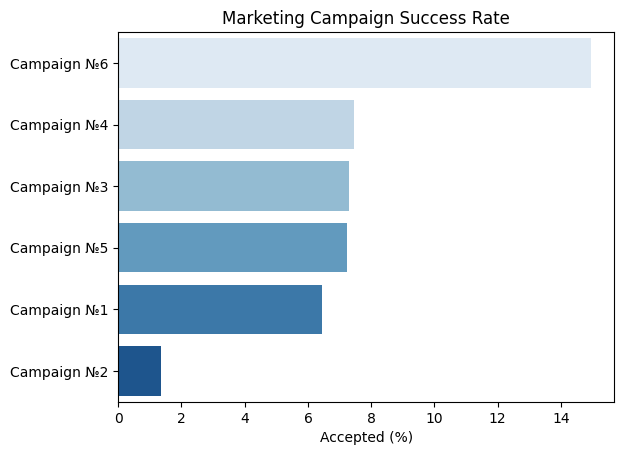

In [48]:
camp_df = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].mean() * 100
camp_df.index = (f"Campaign №{col[-1]}" if "Cmp" in col else "Campaign №6" for col in camp_df.index)

sns.barplot(camp_df.sort_values(ascending=False), orient="h", palette="Blues")
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Accepted (%)")
plt.show()

### Findings

The most successful campaign with the highest acceptance rates is the last campaign (Response column)

## 2. What does the average customer look like for this company?

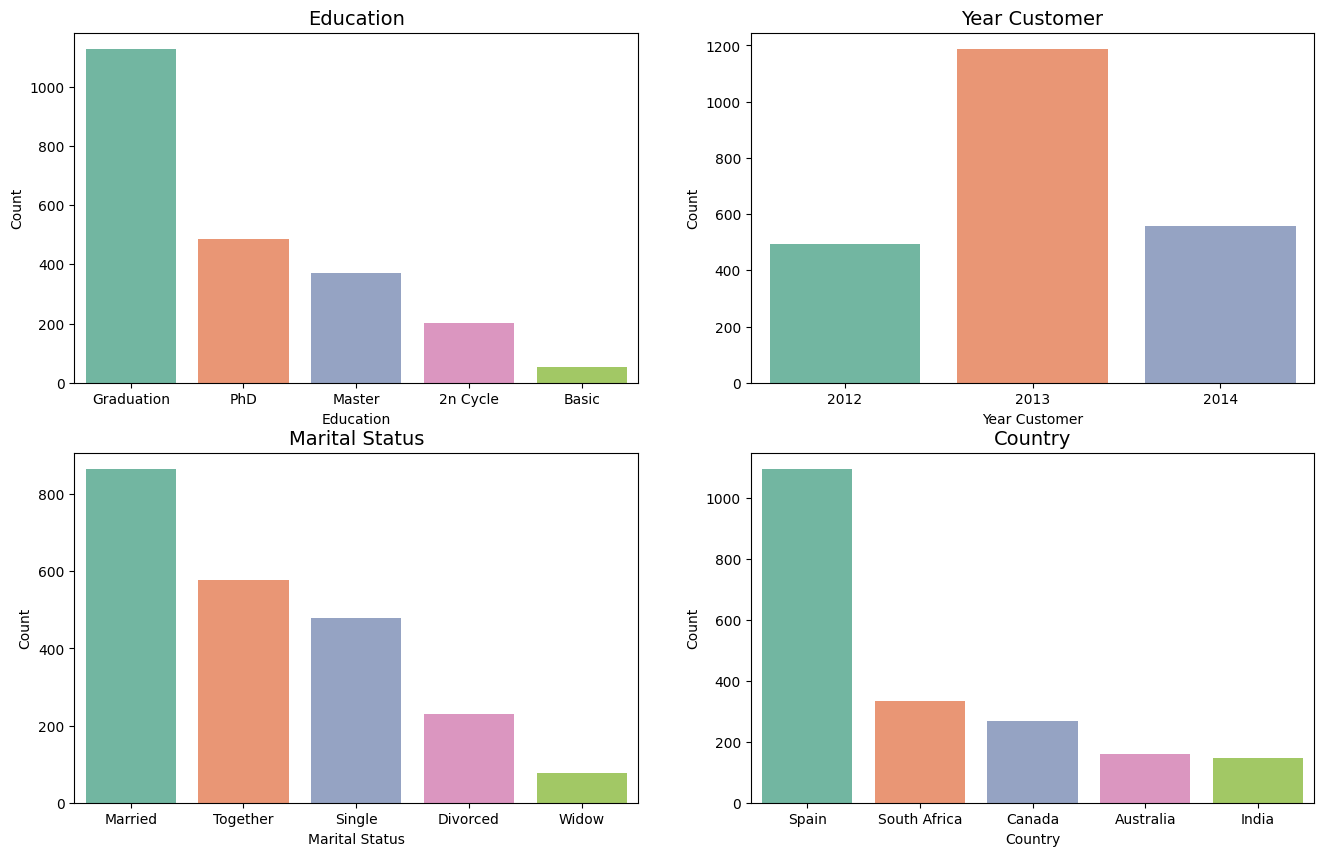

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

temp = df.copy()
temp["Country"] = temp["Country"].replace(
    {
        "SP": "Spain",
        "CA": "Canada",
        "AUS": "Australia",
        "GER": "Germany",
        "IND": "India",
        "SA": "South Africa",
        "ME": "Mexico"
    }
)

i = 0
j = 0
for col in ["Education", "Marital_Status", "Year_Customer", "Country"]:
    data = (
        temp
        .groupby(col)[[col]]
        .count()
        .rename({col: "Count"}, axis=1)
        .reset_index()
        .nlargest(5, "Count")
    )

    sns.barplot(data, x=col, y="Count", palette="Set2", ax=ax[i, j])
    ax[i, j].set_title(col.replace("_", " "), size=14)
    ax[i, j].set_xlabel(col.replace("_", " "))
    
    if i == 1:
        i, j = 0, 1
    else:
        i = 1
        
plt.show()

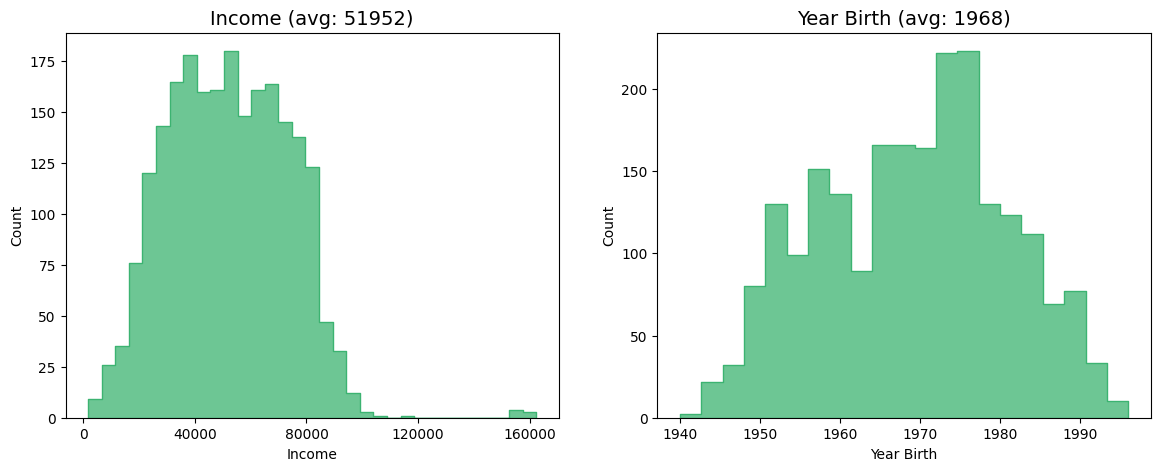

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(["Income", "Year_Birth"]):
    sns.histplot(df, x=col, ax=ax[i], element="step", color="mediumseagreen")
    ax[i].set_title(f"{col.replace("_", " ")} (avg: {df[col].mean().astype(np.int64)})" , size=14)
    ax[i].set_xlabel(col.replace("_", " "))

ax[0].set_xticks(range(0, 160001, 40000))

plt.show()

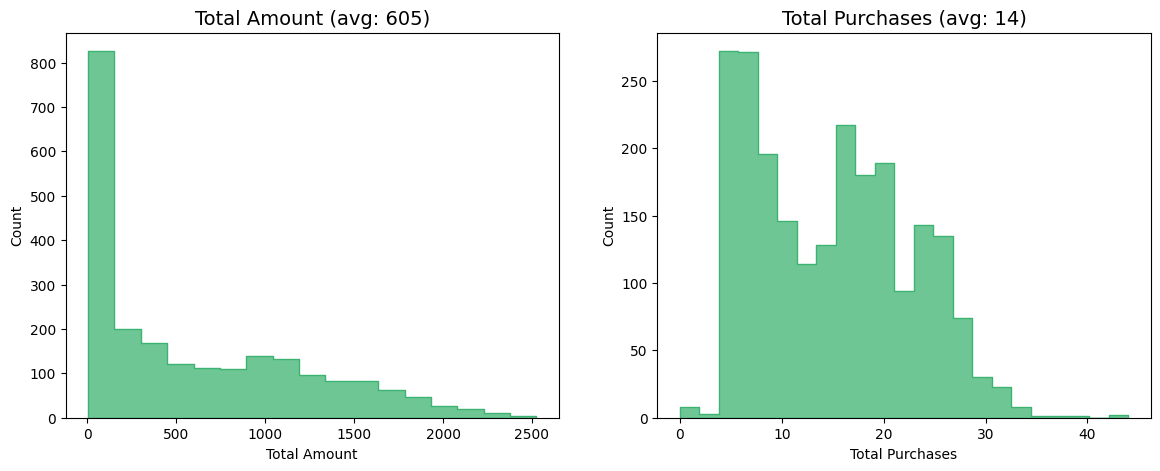

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(["TotalMnt", "TotalPurchases"]):
    sns.histplot(df, x=col, ax=ax[i], element="step", color="mediumseagreen")
    ax[i].set_title(f"{col[:5] + " " + col[5:].replace("Mnt", "Amount")} (avg: {df[col].mean().astype(np.int64)})", size=14)
    ax[i].set_xlabel(col[:5] + " " + col[5:].replace("Mnt", "Amount"))

plt.show()

### Summary:

Average company's customer:
- born: 1968
- income: 52000
- education: graduate
- marital status: married
- country: Spain
- customer since: 2013

For the past 2 years a customer has spent on average $605 and has made 14 purchases

## 3. Which products are performing best?

In [89]:
temp = (
    df[[col for col in df.columns if col.startswith("Mnt")]]
    .mean()
    .rename(
        {
            "MntWines": "Wine Products",
            "MntFruits": "Fruits",
            "MntMeatProducts": "Meat Products",
            "MntFishProducts": "Fish Products",
            "MntSweetProducts": "Sweet Products",
            "MntGoldProds": "Gold Products"
        }
    )
    .sort_values(ascending=False)
)

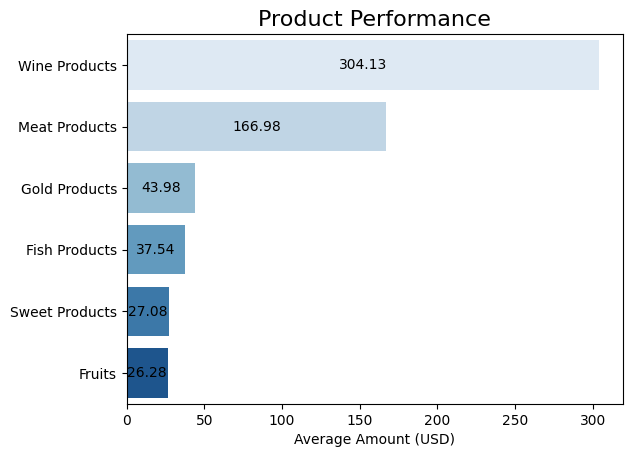

In [90]:
ax = sns.barplot(
    temp,
    orient="h",
    palette="Blues"
)

for label in ax.containers:
    plt.bar_label(label, fmt=lambda x: np.round(x, 2), label_type="center")
    
plt.title("Product Performance", size=16)
plt.xlabel("Average Amount (USD)")

plt.show()

### Findings

The best performing products are Wine (USD 304.13 on average) and Meat (USD 166.98 purchases on average) products

## 4. Which channels are underperforming?

In [99]:
temp = (
    df[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]
    .mean()
    .sort_values()
)
temp.index = map(lambda col: col[3:col.index("P")] + " " + col[col.index("P"):], temp.index)

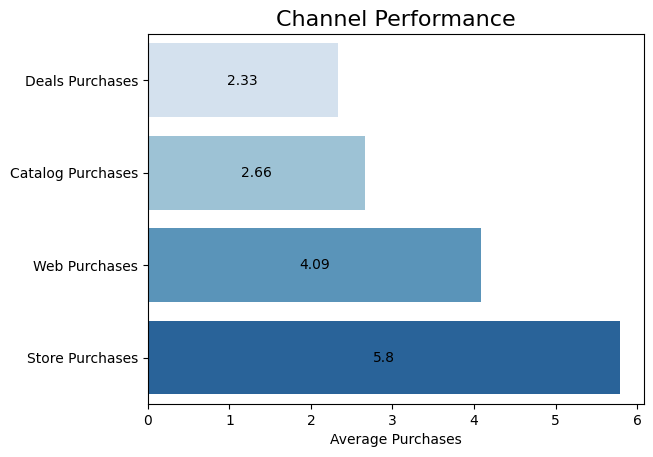

In [100]:
ax = sns.barplot(
    temp,
    orient="h",
    palette="Blues"
)

for label in ax.containers:
    plt.bar_label(label, fmt=lambda x: np.round(x, 2), label_type="center")

plt.title("Channel Performance", size=16)
plt.xlabel("Average Purchases")

plt.show()

### Findings

Underperforming channels:
- Deals Purchases
- Catalog Purchases

# CONCLUSION

- The most successful campaign was the last campaign and it was particularly successful in Mexico\
  Suggested actions: use the model of the last campaign in future campaigns
- Advertising campaign acceptance is positively correlated with income and negatively correlated with having dependents\
  Suggested actions: create two streams of campaigns targeted at high-income customers with no dependents and low-income customers with dependents
- The most successful products are wines and meats\
  Suggested action: focus future campaigns on boosting sales of less popular items
- The best performing channels are web and store purchases\
  Suggested actions: focus future campaigns on more successful channels in order to reach more customers